<a href="https://colab.research.google.com/github/talyabulut/HW-4/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comparison of Google Cloud Translation API Accuracy in Eastern and Western Languages

<img src="https://github.com/AkashShan1/QTM250-example/blob/f068d27d0216deb5d9c918db49f0a1cfaf8081a7/WestvsEast.jpeg?raw=true" width="600">

## Introduction to Machine Translation
Data-driven translation has allowed for translation to become instantly accessible to anyone with internet. However, data-driven translation is notorious for errors made when translating irregular language. The current standard in data-driven translation is neural machine translation (NMT), which relies on a neural network that mimicks human thought. In comparision to NMT, machine translation that utilizes human knowledge can support intricate linguistic rules that are unique to a language. 

Unfortunately, machine translation that uses human knowledge requires intense capital and labor due to language irregularities, lending to the popularity of neural machine translation (NMT). However, it is difficult to integrate human knowledge into this model, making rare irregularities in a language difficult to translate. In addition, GMNT is cited as having considerably less data on non-Western languages. For example, GMNT performs particularly poorly on Asian languages, when compared to other global languages (Aiken, 2019). These errors contribute to a perception that data-driven translation has limited usage to someone in a native or non-Western setting.

Google NMT (GNMT) is the translation service accessible through the Google Translation API, which is cited to improve translating rare instances of a language by parsing rare words and phrases into recognized lexemes. In addition, this process is useful for translating both non-Western and Western languages. Our motivation for researching Google's Translation API is to understand how the GNMT translations differ from native translations both literally and figuratively, and how differences in native and GMNT translation are distributed across Western and Asian languages. As all of us are native speakers for the languages being tested, we found it interesting to see how ML recreates our human knowledge on these languages.

## Google Cloud Translation API Overview 



<img src="https://raw.githubusercontent.com/tobrie5/QTM-250-example/main/google%20cloud%20translation%20api%20overview%20img.png" width="600">

The Google Cloud Machine Learning Translation API is a tool that allows developers to integrate machine learning translation capabilities into applications and/or services. With this API, one can translate text from one language to another, supporting a wide range of language pairs including English, Spanish, French, Chinese, German, Japanese, Korean, etc.

One of the key advantages of the Google Cloud Machine Learning Translation API is its customizable translation models, which allow developers to fine-tune the translation output to meet their specific requirements. This means that you can tailor the translation results for more accurate translations to suit your unique use case and deliver more accurate translations for your users.

In everyday life, the Google Cloud Machine Learning Translation API can be leveraged through enhancing multilingual capabilities of your applications, localizing content for global audiences, and facilitating language translation in specific areas of the market such as e-commerce or content management systems. 

This API also supports auto-detection of the source language, making it very convenient and user-friendly for handling multilingual text inputs – this means that one doesn't always have to explicitly specify the source language, as the API can automatically detect it, saving  time. As always, it's important to note that using the Google Cloud Machine Learning Translation API may be subject to pricing based on your usage level.

In conclusion, the Google Cloud Machine Learning Translation API is a flexible solution for integrating machine learning translation abilities, allowing multilingual experiences and enhancing communication across different languages.





## How does the Google Cloud Translation API work?
<img src="https://github.com/tobrie5/QTM-250-example/blob/main/Real%20world%20Use%20API%20IMG.jpeg?raw=true" width="200">


The API must first be authenticated and authorized, following Google Cloud's standard authentication and authorization procedure. Once authenticated, the API can make an API call with the necessary parameters to initiate the translation process.

The API supports translating text in various formats, including plain text, HTML, and documents. The source can specify target languages for translation, and can also customize the translation output using model customization (the essence of machine learning), which allows you to train your own custom machine translation models to improve translation accuracy and relevance for the specified users. Here is a brief overview utilizing AutoML – a specific custom  translation model: 



<img src="https://github.com/tobrie5/QTM-250-example/blob/main/Translation%20API%20Img.png?raw=true" width="600">


After submitting the translation request, the API will process the input text and return the translated text as part of the API response. The response also includes additional information, which is extremely useful and helpful for analyzing the overall results.

With all of this being said, it's important to note that the usage of the Google Cloud Machine Learning Translation API may be limited in terms of pricing as well as translation accuracy based on specific audiences. 




## Project Goals and Research Method

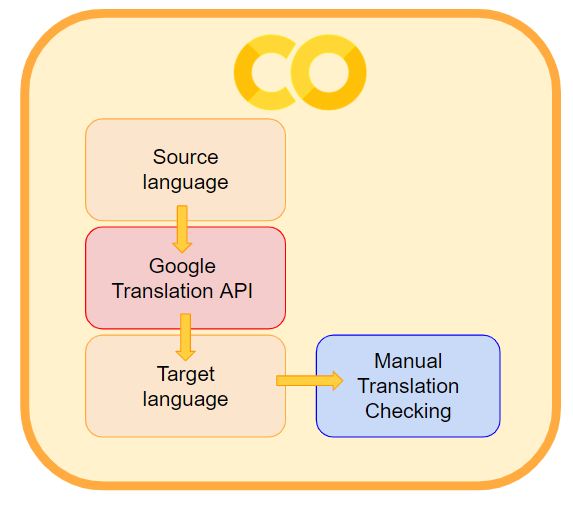

_Figure 1: A visual schematic of our translation process. This Colab hosts the Translation API request, and stores translation outputs as a .csv file, which can then be assessed through human translation_

Using this API, we were curious in viewing the output of both figurative (sentiment/meaning) and literal (word-for-word) accuracy of translations. We utilized the Google Cloud Translation API in our project. We translated common phrases using the API and then had native speakers check for accuracy regarding figurative and literal translations of the model. We also included slang phrases to assess whether these translations were accurate.

For this specific task, we started by identifying common phrases or sentences, from various sources, used in everyday conversation. We then sent this text data to the Google Cloud Translation API, which automatically translated the text into the target language.

After obtaining the translations, we compared them with the original text in the source language to assess the figurative and literal accuracy. Native speakers with expertise in the target language reviewed the translations and provided feedback on their accuracy, particularly with respect to figurative language usage and the translation of slang phrases.

We were able to efficiently translate text data and assess the figurative and literal accuracy of the translations. This allowed us to evaluate the quality of the translations, identify any discrepancies between the translated and original text, and gain insights into the accuracy of figurative language usage and the translation of slang phrases. To summarize: we hoped to compare the figurative and literal accuracy of the translator API for Western and Eastern Languages. The languages we observed are as follows:
Western Languages - French and Spanish; Eastern Languages - Turkish, Arabic, Tamil, and Bangla. 

We then created a list of commonly-used English phrases that included 
35 regularly-used terms -
ex. “It is great to meet you.”
“What do you think about this?”
15 phrases that included slang or aphorisms
“Let’s take a raincheck on our date tonight.”
“Kyrie’s handle in that game went crazy last night.”


In [ ]:
# Storing API Key
import getpass

APIKEY = getpass.getpass()

··········


In [ ]:
from google.cloud import translate_v2 as translate

In [ ]:
# Building client
# running Translate API
from googleapiclient.discovery import build
service = build('translate', 'v2', developerKey=APIKEY)

# use the service
inputs = ['is it really this easy?', 'amazing technology', 'wow']
outputs = service.translations().list(source='en', target='fr', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

is it really this easy? -> est-ce vraiment si facile ?
amazing technology -> technologie incroyable
wow -> Ouah


In [ ]:
with open('/content/translate.txt', 'r') as f:
  txt = f.read()
txt = lines = txt.split('\n')

In [ ]:
d = {}
for target in ['es', 'fr', 'ar', 'bn', 'ta', 'tr']:
  d[target] = [i['translatedText'] for i in service.translations().list(source='en', target=target, q=txt).execute()['translations']]
d['en'] = txt

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(d).to_csv('data.csv')

## Results and Analysis

After using the Cloud Translation API to translate 50 phrases of English to the languages of Spanish, French, Arabic, Bangla, Tamil, and Turkish, we asked native speakers to identify whether these translations matched their English counterparts either through a literal (word-by-word) comparison or a figurative (sentiment/meaning) comparison. These 50 phrases of English were comprised of 35 commonly-used phrases and 15 slang phrases so that the language type could also be analyzed. The proportion of accurate responses for each language and average proportion of each type of language (Western vs. Eastern) was compared across language type. 

*The data used for this analysis can be found here: https://docs.google.com/spreadsheets/d/1FtnX7EfVOCxNiu_i0rMIVuPEdsdeCAmcXmbq11YiT7o/edit?usp=sharing*

<img src="https://github.com/AkashShan1/QTM250-example/blob/f068d27d0216deb5d9c918db49f0a1cfaf8081a7/CompLiteral.png?raw=true" width="600">

Through a comparison of the literal accuracy of these translations, we found that the Cloud Translation API showed higher word-for-word translation accuracy for Western Languages like Spanish and French when compared to Eastern Languages like Arabic, Bangla, Tamil, and Turkish. When split into common English phrases and slang phrases, these trends held true as the Cloud Translation API showed higher accuracy for Western Lanugages for both categories.  

<img src="https://github.com/AkashShan1/QTM250-example/blob/f068d27d0216deb5d9c918db49f0a1cfaf8081a7/CompFig.png?raw=true" width="600">

Through a comparison of the figurative accuracy of these translations, we found the Cloud Translation API again showed higher sentiment translation accuracy for Western Languages when compared to Eastern languages. Similarly, these trends held true for both common English phrases and slang phrases. 

<img src="https://github.com/AkashShan1/QTM250-example/blob/f068d27d0216deb5d9c918db49f0a1cfaf8081a7/SpecLit.png?raw=true" width="600">

We then sought to analyze these trends by comparing the accuracy for each language within each language type. For literal accuracy of these translations, we found sub-groups that matched our earlier findings. Both Spanish and French had similar overall accuracy that was higher than all other languages. With the exception of Arabic which was the least accurate language, all other Eastern languages had similar accuracies but were less accurate than the Western languages. Similar trends held true from the overall trends to the common English phrases. However, distinct regional sub-groups were shown in the accuracy of slang phrase translation. South Asian languages like Tamil and Bangla showed similar rates of accuracy in this language group and also were the highest rate of accuracy. Next was Spanish and French, but the lowest were the Middle Eastern languages of Arabic and Turkish, driving the differences between Western and Eastern languages. These sub-groups suggest there may be regional trends in the literal, word-for-word accuracy of the Cloud Translation API for slang phrases. 

<img src="https://github.com/AkashShan1/QTM250-example/blob/f068d27d0216deb5d9c918db49f0a1cfaf8081a7/SpecFig.png?raw=true" width="600">

For figurative accuracy for each language within each language type, there were no distinct trends in the language type of common English phrases. However, both Arabic and Spanish showed high sentiment accuracy for slang phrases, while all other languages showed low sentiment accuracy for slang phrases. These differences may have driven the overall response that showed higher accuracy in the Western Languages when compared to Eastern Languages. 


While sub-group differences may be confounding this analysis, our results show higher accuracy of the Cloud Translation API for Western Language over Eastern Language.

## Conclusion

Through our analysis, we can conclude that the Cloud Translator API showed higher accuracy for Western Languages when compared to Eastern Languages. This trend held true even after analyzing trends in specific sub-types of language like slang phrases and commonly used phrases. 

We also found certain sub-groups of languages that seemed to either serve as outliers or drive the differences between Eastern and Western Languages. More analysis into accuracy by how commonly spoken the language is may be helpful in this subgroup analysis. Additional languages into both groups would also help further explore differences between Eastern and Western languages. 

Something to note is there are many potential factors that come into play when assessing language translations in terms of literal and figurative meaning. When thinking about future direction, it’s important to consider potential cultural nuances, managing trade-offs between accuracy and speed of the API, and lastly, thinking about ethical implications of translation API and how we can avoid bias ML models. These directions could help improve translation accuracy for different language groups and subgroups, enhance usability, and increase overall user satisfaction. We were limited with two western languages, therefore, further research should be done to identify and reinforce the true difference between accuracy for the Google Cloud Translation API as well as compare to other existing ML Translation APIs. 